In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("/content/Pulsar.csv")

In [ ]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


#last column is our label(y)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: Class, Length: 17898, dtype: int64


In [ ]:
df.corr()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
SD,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
EK,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean_DMSNR_Curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
SD_DMSNR_Curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
EK_DMSNR_Curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness_DMSNR_Curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
Class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


#split the data ito train and test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled,Y_train)
#predictions
y_prediction = model.predict(X_test_scaled)
#accuracy
accuracy = accuracy_score(Y_test,y_prediction)
print(f"Accuracy os logistic regression is {accuracy}")


Accuracy os logistic regression is 0.9787709497206704


In [ ]:
print(classification_report(Y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



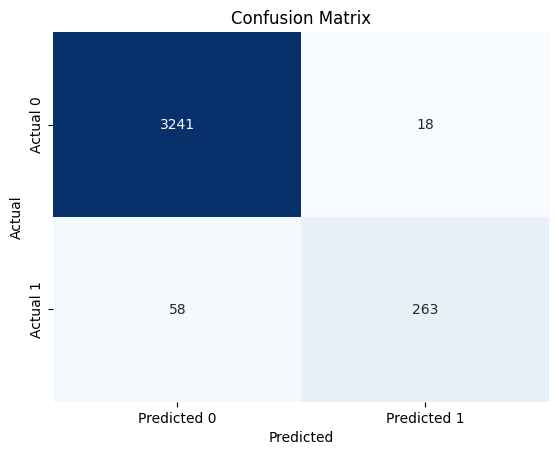

In [ ]:
cm = confusion_matrix(Y_test, y_prediction)

#visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#KNN

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)    #n=5
model_knn.fit(X_train_scaled,Y_train)
y_prediction_knn = model_knn.predict(X_test_scaled)
accuracy1 = accuracy_score(Y_test,y_prediction_knn)
# print(f"Accuracy os KNN is {accuracy1}")
print(classification_report(Y_test, y_prediction_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



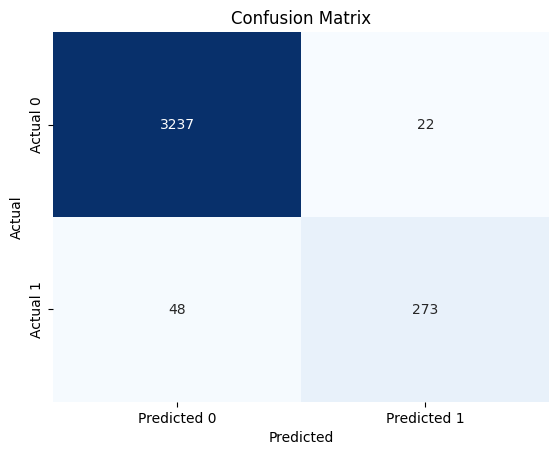

In [ ]:
cm = confusion_matrix(Y_test, y_prediction_knn)

#visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Sopport Vector Machine

In [ ]:
model_svm = svm.SVC()
model_svm.fit(X_train_scaled, Y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
accuracy1 = accuracy_score(Y_test,y_pred_svm)
# print(f"Accuracy os KNN is {accuracy1}")
print(classification_report(Y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



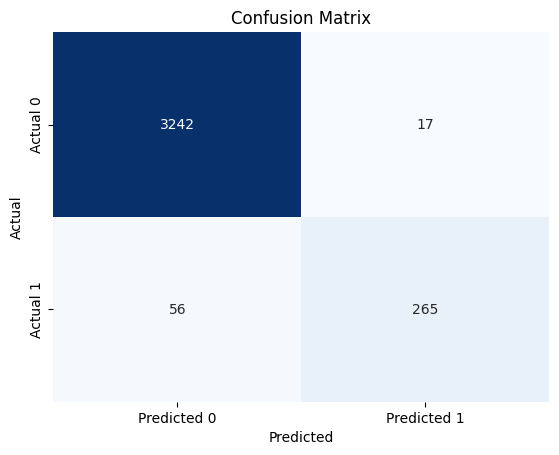

In [ ]:
cm = confusion_matrix(Y_test, y_pred_svm)

#visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Decision tree

In [ ]:
model_decision_tree= DecisionTreeClassifier()
model_decision_tree.fit(X_train, Y_train)
y_pred_decision_tree = model_decision_tree.predict(X_test)
accuracy1 = accuracy_score(Y_test,y_pred_decision_tree)
# print(f"Accuracy os KNN is {accuracy1}")
print(classification_report(Y_test,y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3259
           1       0.83      0.85      0.84       321

    accuracy                           0.97      3580
   macro avg       0.91      0.91      0.91      3580
weighted avg       0.97      0.97      0.97      3580



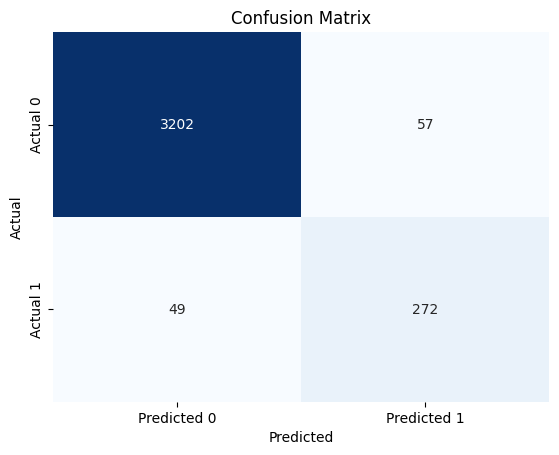

In [ ]:
cm = confusion_matrix(Y_test, y_pred_decision_tree)

#visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#XG Boost

In [ ]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
# instantiate the classifier
xgb_clf = XGBClassifier(**params)
# fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)
y_pred_xg = xgb_clf.predict(X_test)
accuracy1 = accuracy_score(Y_test,y_pred_xg)
# print(f"Accuracy os KNN is {accuracy1}")
print(classification_report(Y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.92      0.85      0.88       321

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



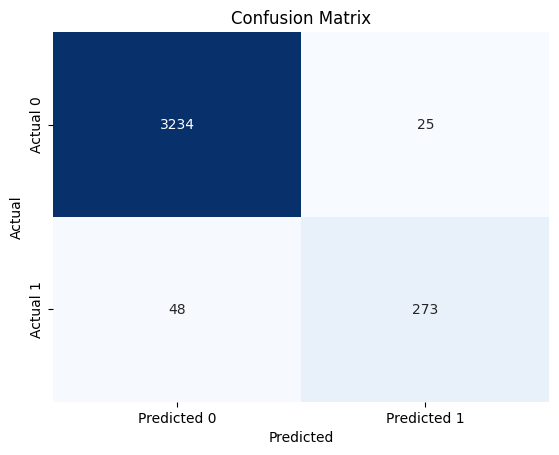

In [ ]:
cm = confusion_matrix(Y_test, y_pred_xg)

#visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()